# <center><a href='https://colab.research.google.com/github/cpge-itc/itc1/blob/main/files/5_graph/3_traversal/dfs/code_dfs.ipynb'>Code : Parcours en profondeur <img src=https://colab.research.google.com/assets/colab-badge.svg width=100></a></center>

## Graphe de test

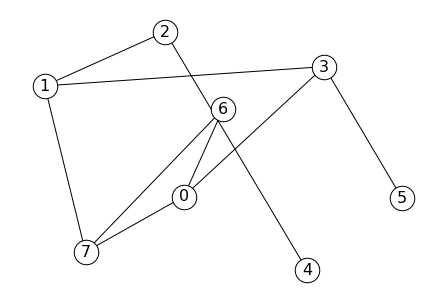

In [2]:
try:
    __import__("cpge")
except ImportError:
    ! pip install git+https://github.com/fortierq/itc-code &> /dev/null
import cpge.graph

G = cpge.graph.random_list()
cpge.graph.draw(G)

## DFS avec fonction récursive

In [4]:
def dfs(G, s):
    visited = [False]*len(G)
    def aux(u):
        if not visited[u]:
            print(u, end=" ")
            visited[u] = True
            for v in G[u]:
                aux(v)
    aux(s)

dfs(G, 0) # affichage des sommets dans un ordre de parcours en profondeur

0 3 1 2 4 7 6 5 

### DFS avec pile

In [5]:
def dfs(G, s):
    visited = [False]*len(G)
    pile = [s]
    while len(pile) > 0:
        u = pile.pop()
        if not visited[u]:
            print(u, end=" ")
            visited[u] = True
            for v in G[u]:
                pile.append(v)

dfs(G, 0)

0 7 6 1 3 5 2 4 

## Animation du DFS

In [6]:
cpge.graph.anim_dfs(G)